<a href="https://colab.research.google.com/github/mittalmeghna/projects/blob/master/MNIST_Using_ANN_MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST - Classification

<center><img src="https://www.dropbox.com/s/i37mgynkrf1d3vb/supervised_flow_chart.png?raw=1" height=300px width=1000px></img></center>

# 01 : Frame the Problem

We need to build a classifier using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning. 

Whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST. 

Each image is labeled with the digit it represents. Each digit is represented by 28 x 28, each cell representing pixel depth.

# 02 : Obtaining the Data

### Import the Libraries

In [0]:

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils

Using TensorFlow backend.


### Initialize the necessary variables

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

### Reading the image data from Keras

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 03 : Analyze Data

Prepare the Features and Target variables.
To analyze what is the shape of the feature set.

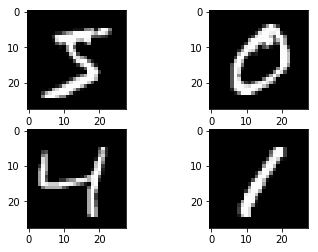

In [0]:
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Visualizing a random digit using the Matplotlib Library

# 04 : Feature Engineering

MNIST data is divided as follows:  
- Train Data - First 60000 rows  
- Test Data - Last 10000 rows  

In [0]:
# Reshaping the image to the size of the image i.e, 28 x 28

num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

In [0]:
# Normalizing the pixel data

x_train /= 255
x_test /= 255

In [0]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
num_classes

10

# 05 : Model Selection

### Create the Baseline Model

Create the baseline model using seqeuential and dense from Keras module.

In [0]:
x_train.shape

(60000, 784)

In [0]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [0]:
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_train.shape

(60000, 784)

In [0]:
y_train.shape

(60000, 10)

In [0]:
# build the model
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.2472 - acc: 0.9291 - val_loss: 0.1093 - val_acc: 0.9670
Epoch 2/10
 - 1s - loss: 0.0851 - acc: 0.9739 - val_loss: 0.0835 - val_acc: 0.9742
Epoch 3/10
 - 1s - loss: 0.0530 - acc: 0.9835 - val_loss: 0.0631 - val_acc: 0.9798
Epoch 4/10
 - 1s - loss: 0.0363 - acc: 0.9889 - val_loss: 0.0692 - val_acc: 0.9776
Epoch 5/10
 - 1s - loss: 0.0255 - acc: 0.9921 - val_loss: 0.0856 - val_acc: 0.9753
Epoch 6/10
 - 1s - loss: 0.0237 - acc: 0.9917 - val_loss: 0.0700 - val_acc: 0.9787
Epoch 7/10
 - 1s - loss: 0.0175 - acc: 0.9942 - val_loss: 0.0791 - val_acc: 0.9801
Epoch 8/10
 - 1s - loss: 0.0131 - acc: 0.9959 - val_loss: 0.0692 - val_acc: 0.9815
Epoch 9/10
 - 1s - loss: 0.0148 - acc: 0.9948 - val_loss: 0.0817 - val_acc: 0.9802
Epoch 10/10
 - 1s - loss: 0.0123 - acc: 0.9955 - val_loss: 0.0780 - val_acc: 0.9812


In [0]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.88%


In [0]:
print('Test accuracy:', scores[1])

Test accuracy: 0.9812


In [0]:
scores

[0.07802253419304116, 0.9812]

<center><h1>The End</h1></center>